In [1]:
from Basics import *
setplot(dark=True)

from cobaya.samplers.mcmc import plot_progress
from cobaya.yaml import yaml_load_file
from cobaya.run import run
from cobaya import load_samples
import getdist.plots as gdplt
%matplotlib inline

# Before running the chains

In [3]:
info_from_yaml = yaml_load_file("/global/homes/c/cpopik/Capybara/runchains.yaml")

updated_info_minimizer, minimizer = run(info_from_yaml, minimize=True, force=True)
model = minimizer.model.likelihood['tsztest']
minimum = minimizer.products()["minimum"]

pars = [k for k, v in info_from_yaml['params'].items() if isinstance(v, dict) and "prior" in v]
parslabel = [v['latex'] for k, v in info_from_yaml['params'].items() if isinstance(v, dict) and "prior" in v]
pars0 = {k: v['ref'] for k, v in info_from_yaml['params'].items() if isinstance(v, dict) and "prior" in v}
parsfit = {k: minimum[k] for k, v in info_from_yaml['params'].items() if isinstance(v, dict) and "prior" in v}

INFO:output:Output to be read-from/written-into folder 'chains/7-21-25', with prefix 'test1'


[output] Output to be read-from/written-into folder 'chains/7-21-25', with prefix 'test1'


2025-07-21 11:38:26.709731: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-07-21 11:38:26.709830: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-07-21 11:38:26.786576: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-07-21 11:38:26.956618: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-07-21 11:38:29.897657: W tensorflow/compiler/tf2

Loading Cosmology functions
Loading SHMR
Loading HOD
Loading Data
Loading Galaxy Distributions
Loading HMF
Loading Average Functions
Loading Projection Functions
Initializing Model


INFO:minimize:Initializing


[minimize] Initializing


INFO:minimize:Run 1/2 will start from random initial point:


[minimize] Run 1/2 will start from random initial point:


INFO:minimize:{'P0': 2.0, 'alpha_t': 0.8, 'beta_t': 2.6, 'A2h_t': 0.7}


[minimize] {'P0': 2.0, 'alpha_t': 0.8, 'beta_t': 2.6, 'A2h_t': 0.7}


INFO:minimize:Run 2/2 will start from random initial point:


[minimize] Run 2/2 will start from random initial point:


INFO:minimize:{'P0': 2.0, 'alpha_t': 0.8, 'beta_t': 2.6, 'A2h_t': 0.7}


[minimize] {'P0': 2.0, 'alpha_t': 0.8, 'beta_t': 2.6, 'A2h_t': 0.7}


[prior] *WARNING* Reference pdf not defined or improper for some parameters. Using prior's sigma instead for them.


INFO:minimize:Starting run 1/2


[minimize] Starting run 1/2


INFO:minimize:Run 1/2 converged.


[minimize] Run 1/2 converged.


INFO:minimize:Starting run 2/2


[minimize] Starting run 2/2


INFO:minimize:Run 2/2 converged.


[minimize] Run 2/2 converged.


INFO:minimize:Finished successfully!


[minimize] Finished successfully!


INFO:minimize:-log(posterior) minimized to 24.4568


[minimize] -log(posterior) minimized to 24.4568


INFO:minimize:Parameter values at minimum:
   weight  minuslogpost        P0   alpha_t    beta_t     A2h_t  minuslogprior  minuslogprior__0       chi2  chi2__tsztest
0     1.0     24.456845  2.041222  0.912297  2.748539  0.730683       5.087596          5.087596  38.738497      38.738497


[minimize] Parameter values at minimum:
   weight  minuslogpost        P0   alpha_t    beta_t     A2h_t  minuslogprior  minuslogprior__0       chi2  chi2__tsztest
0     1.0     24.456845  2.041222  0.912297  2.748539  0.730683       5.087596          5.087596  38.738497      38.738497


INFO:minimize:Full set of minima:
{'0': (24.456844976569275, True), '1': (24.456844976569275, True)}


[minimize] Full set of minima:
{'0': (24.456844976569275, True), '1': (24.456844976569275, True)}


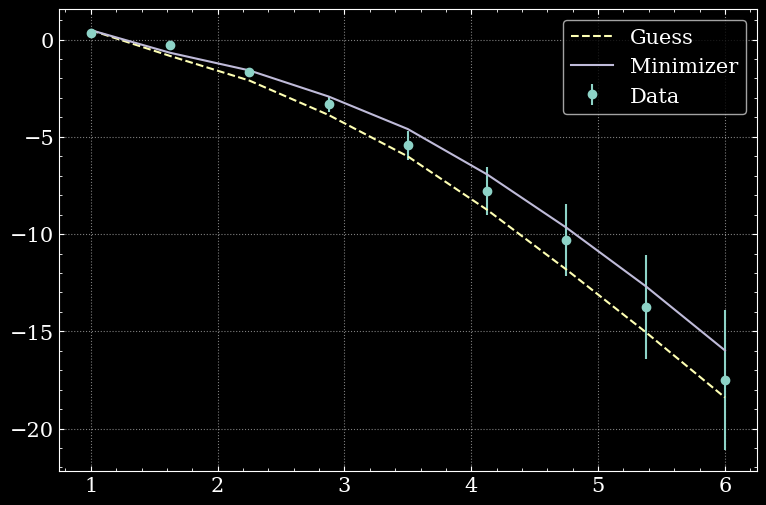

(<matplotlib.legend.Legend at 0x7f516159ee00>, None)

In [ ]:
plt.errorbar(model.meas.thetas, model.meas.tSZdata, np.diag(model.meas.tSZcov)**0.5, marker='o', ls='', label='Data')

plt.plot(model.meas.thetas, model._get_theory(pars0), ls='--', label='Guess')

plt.plot(model.meas.thetas, model._get_theory(dict(minimum.MAP())), label='Minimizer')
plt.legend()
plt.show()

# While running the chains

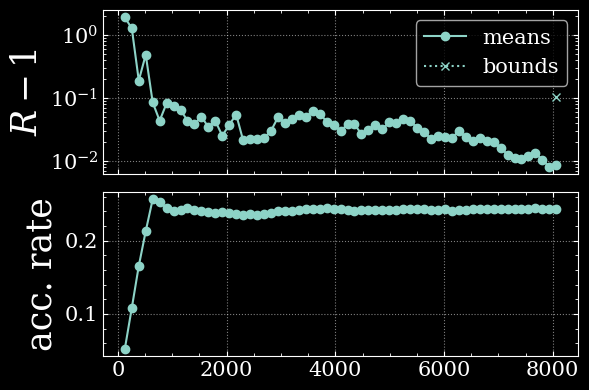

In [16]:
plot_progress(info_from_yaml["output"], figure_kwargs={"figsize": (6,4)})

plt.tight_layout()
plt.show()

(10080, 10)

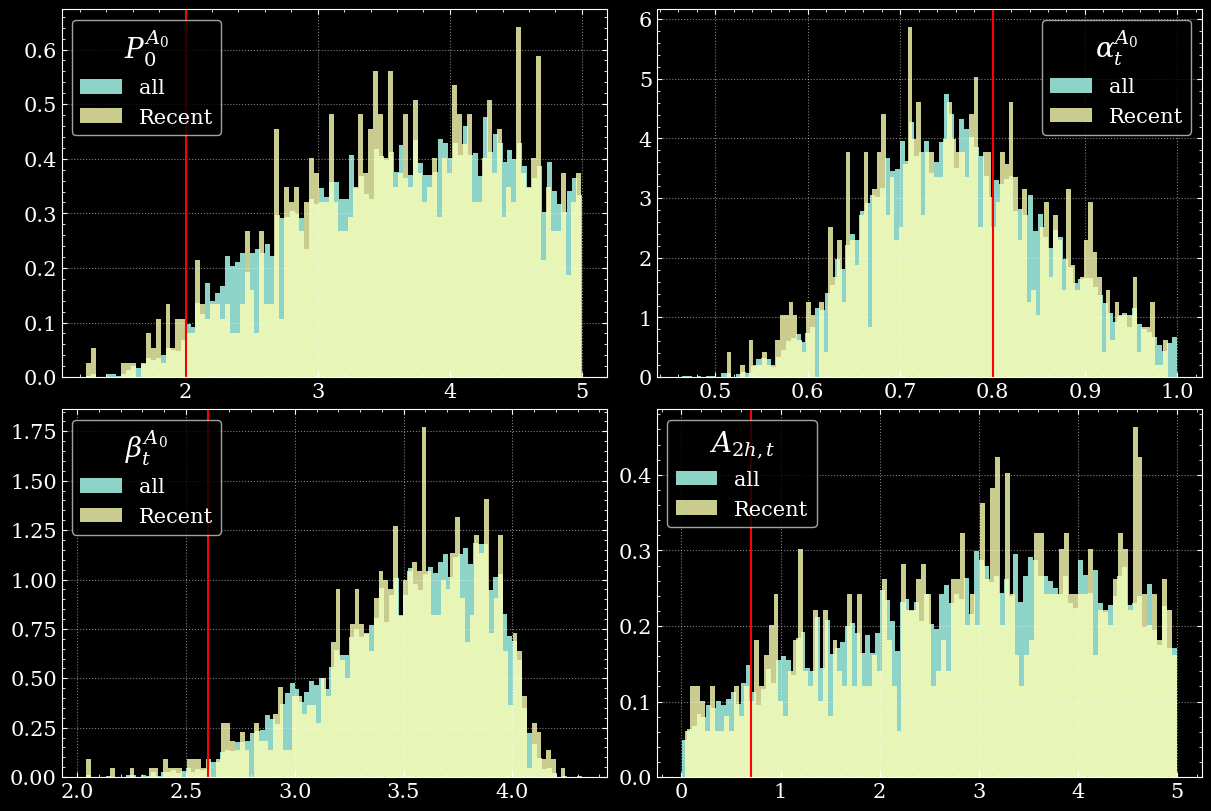

In [ ]:
folder,name = os.path.split(os.path.abspath(info_from_yaml["output"]))
results = pd.DataFrame(np.genfromtxt(f"{folder}/{name}.txt", names=True).T)

fig, axs = plt.subplots(2, 2, figsize=(12, 8), layout='constrained')
for ax, param, pstr, pval in zip(axs.flatten(), pars0.keys(), parslabel, pars0.values()):
    ax.hist(results[param], 100, density=True, label='all')
    # ax.hist(results[param][-1000::], 100, density=True, alpha=0.8, label='Recent')
    ax.axvline(pval, c='r')
    ax.legend(title=rf'${pstr}$')

results.shape

# After running the chains

In [124]:
# Export the results to GetDist
gd_sample = load_samples(info_from_yaml["output"], to_getdist=True)

# Analyze and plot
mean = {list(pars0.keys())[i]: gd_sample.getMeans()[i] for i in range(len(pars0.keys()))}
covmat = gd_sample.getCovMat().matrix[:-2, :-2]

INFO:samplecollection:Loaded 10080 sample points from 'chains/cobaya_TEST_0.001.1.txt'


[samplecollection] Loaded 10080 sample points from 'chains/cobaya_TEST_0.001.1.txt'


[root] *WARNING* outlier fraction 9.92063492063492e-05 


In [ ]:
# chainsresults = [model._get_theory({par: row[1][par] for par in results.columns[2:-4]}) for row in results[200:].iterrows()]

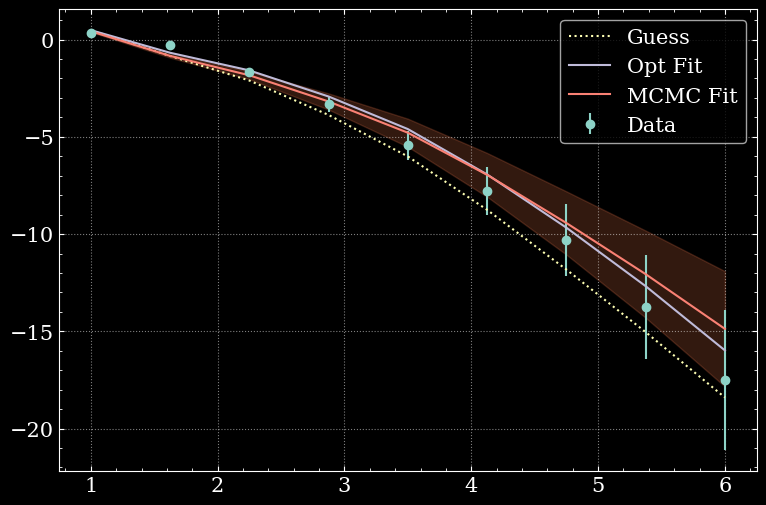

(<matplotlib.legend.Legend at 0x7f5160ffb610>, None)

In [125]:
plt.errorbar(model.meas.thetas, model.meas.tSZdata, np.diag(model.meas.tSZcov)**0.5, marker='o', ls='', label='Data')

plt.plot(model.meas.thetas, model._get_theory(pars0), label='Guess', ls=':')

plt.plot(model.meas.thetas, model._get_theory(dict(minimum.MAP())), label='Opt Fit')
plt.plot(model.meas.thetas, model._get_theory(mean), label='MCMC Fit')
plt.fill_between(model.meas.thetas, model._get_theory(mean)-np.std(chainsresults, axis=0), 
                 model._get_theory(mean)+np.std(chainsresults, axis=0), alpha=0.2, color='coral')

plt.legend(), plt.show()

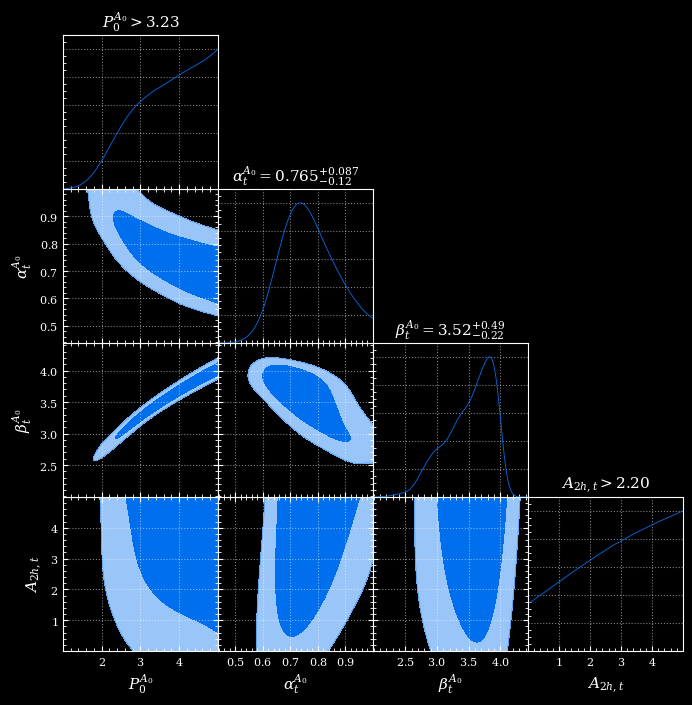

In [133]:
gdplot = gdplt.get_subplot_plotter(chain_dir=folder)
gdplot.settings.title_limit_fontsize=14

gdplot.triangle_plot(name, params=pars0.keys(), title_fmt='latex', title_limit=1, filled=True)